In [ ]:
import pandas as pd
import pickle
from collections import Counter

# ÏûÖÎ†•
data_name = 'XOM'  # BTC, AAPL, BRKb
c_n = 8
alpha = '' # _alpha8, 0.6Ïù¥Î©¥ ÏïÑÎ¨¥Í≤ÉÎèÑ Ïïà ÎÑ£Ïùå
stage = 'train' # train, test
data = pd.read_csv(f'/Data/{data_name}/{data_name}_{stage}.csv')
drop_cols = ['date', 'MA5', 'MA20', 'MA50', 'MA200', 'OT']
data_values = data.drop(columns=[col for col in drop_cols if col in data.columns])

base_path = f'/SIMPC/res/{data_name}/simpc_Framework2_{data_name}_cvr_clus{c_n}_k{c_n}_l18-22_dba_trad'
file_path = f'{base_path}_labels.pkl'
with open(file_path, 'rb') as f:
    labels = pickle.load(f)

file_path = f'{base_path}_centroids.pkl'
with open(file_path, 'rb') as f:
    centroid = pickle.load(f)
    print('centroids shape: ', centroid.shape)
    
label_counts = Counter(labels)
for label, count in label_counts.items():
    print(f"Label {label}: {count}Í∞ú")

file_path = f'{base_path}_segmentation.pkl'
with open(file_path, 'rb') as f:
    segmentation = pickle.load(f)
    
file_path = f'{base_path}_subsequences.pkl'
with open(file_path, 'rb') as f:
    subsequence = pickle.load(f)
    print(subsequence[5].shape)



window_size = 20 #--> ÎÇòÏ§ëÏóê interÌïú Îí§Ïóê 80ÌîÑÎ°úÎßå Ïì∏ Í≤ÉÍ≤É
margin = 2  # Ìå®ÌÑ¥Í≥º Îñ®Ïñ¥ÏßÑ ÏµúÏÜå Í±∞Î¶¨

# 1. Ìå®ÌÑ¥ÏóêÏÑú ÏÇ¨Ïö©Îêú Ïù∏Îç±Ïä§ ÏßëÌï© ÎßåÎì§Í∏∞
used_indices = set()
for start in segmentation:
    used_indices.update(range(start - margin, start + margin + 1))  # margin Ìè¨Ìï®

# 2. Í∞ÄÎä•Ìïú ÏãúÏûë Ïù∏Îç±Ïä§ ÌõÑÎ≥¥ ÏÉùÏÑ±
max_start = len(data_values) - window_size
candidate_indices = [i for i in range(max_start) if i not in used_indices]

print('ÎÖ∏Ïù¥Ï¶à ÌõÑÎ≥¥ Ïàò: ', len(candidate_indices))
print('Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ÏóêÏÑú Ìå®ÌÑ¥Ïùò Î∞úÏÉù ÎπÑÏú®', len(segmentation) / len(data_values))

# 4. noise subsequences ÎßåÎì§Í∏∞
noise_subsequences = [data_values[i:i+window_size] for i in candidate_indices]
print('noise_subsequence Ïàò: ', len(noise_subsequences)) #(45, 22, 3)
print('noise_subsequence.shape[1]: ', len(noise_subsequences[0])) #(x, 22, 3)

centroids shape:  (8, 22, 3)
Label 0: 83Í∞ú
Label 1: 77Í∞ú
Label 2: 84Í∞ú
Label 3: 134Í∞ú
Label 4: 90Í∞ú
Label 5: 61Í∞ú
Label 6: 69Í∞ú
Label 7: 44Í∞ú
(22, 3)
ÎÖ∏Ïù¥Ï¶à ÌõÑÎ≥¥ Ïàò:  180
Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ÏóêÏÑú Ìå®ÌÑ¥Ïùò Î∞úÏÉù ÎπÑÏú® 0.18849089841456254
noise_subsequence Ïàò:  180
noise_subsequence.shape[1]:  20


In [561]:
# 1. subsequenceÏôÄ noise_subsequences Ìï©ÏπòÍ∏∞
subsequence_list = list(subsequence)
noise_array_list = [df.values for df in noise_subsequences]
all_subsequences = subsequence_list  + noise_array_list #array

# 2. segmentationÍ≥º candidate_indices Ìï©ÏπòÍ∏∞
all_indices = list(int(i) for i in segmentation) + list(candidate_indices) #list

# 3. labelsÏôÄ -1Î°ú Ï±ÑÏö¥ Î¶¨Ïä§Ìä∏ Ìï©ÏπòÍ∏∞
all_labels = list(labels) + [-1] * len(candidate_indices)

# Í≤∞Í≥º ÌôïÏù∏
print(f"Ï†ÑÏ≤¥ subsequence Ïàò: {len(all_subsequences)}")        # pattern + noise
print(f"Ï†ÑÏ≤¥ index Ïàò: {len(all_indices)}")                  # subsequenceÏùò ÏãúÏûë ÏúÑÏπò
print(f"Ï†ÑÏ≤¥ label Ïàò: {len(all_labels)}")                  # subsequenceÏùò label (-1ÏùÄ noise)

# ÏùºÍ¥ÄÏÑ± ÌôïÏù∏
assert len(all_subsequences) == len(all_indices) == len(all_labels), "Í∏∏Ïù¥Í∞Ä ÏùºÏπòÌïòÏßÄ ÏïäÏùå!"

Ï†ÑÏ≤¥ subsequence Ïàò: 822
Ï†ÑÏ≤¥ index Ïàò: 822
Ï†ÑÏ≤¥ label Ïàò: 822


In [562]:
#Î≥¥Í∞Ñ Î∞è 0-1 Ï†ïÍ∑úÌôî ÏûëÏóÖ

import numpy as np
import pandas as pd
from scipy.interpolate import interp1d


def interpolate_normalize_subsequences(subsequences, target_length=100):
    """
    Î™®Îì† Ïù∏Ïä§ÌÑ¥Ïä§(68Í∞ú)ÏôÄ Î≥ÄÏàò(3Í∞ú)Ïóê ÎåÄÌï¥ ÏãúÍ≥ÑÏó¥ÏùÑ target_length(100)ÏúºÎ°ú ÏÑ†Ìòï Î≥¥Í∞Ñ.

    :param subsequences: (68, 3, x) ÌòïÌÉúÏùò Î¶¨Ïä§Ìä∏ (xÎäî Í∞ÄÎ≥Ä Í∏∏Ïù¥)
    :param target_length: Î≥¥Í∞Ñ ÌõÑ Î™©Ìëú Í∏∏Ïù¥ (Í∏∞Î≥∏Í∞í 100)
    :return: (68, 3, 100) ÌòïÌÉúÏùò numpy Î∞∞Ïó¥
    """
    num_instances = len(subsequences)  # Ïù∏Ïä§ÌÑ¥Ïä§ Ïàò (68)
    print('num_instances', num_instances)
    num_variables = len(subsequences[0])  # Î≥ÄÏàò Ïàò (3)
    print('num_variables',num_variables)

    # Î≥¥Í∞Ñ ÌõÑ Ï†ÄÏû•Ìï† Î∞∞Ïó¥
    interpolated_data = np.zeros((num_instances, num_variables, target_length))

    for i in range(num_instances):  # Í∞Å Ïù∏Ïä§ÌÑ¥Ïä§ Î∞òÎ≥µ
        for j in range(num_variables):  # Í∞Å Î≥ÄÏàò Î∞òÎ≥µ
            series = np.array(subsequences[i][j])  # ÌòÑÏû¨ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ (x Í∏∏Ïù¥)

            # Í∏∞Ï°¥ x Ï¢åÌëú ÏÑ§Ï†ï
            original_length = len(series)
            x_old = np.linspace(0, 1, original_length)  # Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Ïùò x Ï¢åÌëú
            x_new = np.linspace(0, 1, target_length)  # ÏÉàÎ°úÏö¥ Í∏∏Ïù¥Ïùò x Ï¢åÌëú

            # ÏÑ†Ìòï Î≥¥Í∞Ñ Ìï®Ïàò Ï†ÅÏö©
            interpolator = interp1d(x_old, series, kind='cubic')
            interpolated_series = interpolator(x_new)

            # Ï†ïÍ∑úÌôî (Min-Max Scaling)
            min_val = np.min(interpolated_series)
            max_val = np.max(interpolated_series)
            if max_val - min_val == 0:
                normalized_series = np.zeros_like(interpolated_series)  # Í∞íÏù¥ Î™®Îëê Í∞ôÏúºÎ©¥ 0ÏúºÎ°ú Ï±ÑÏõÄ
            else:
                normalized_series = (interpolated_series - min_val) / (max_val - min_val)

            interpolated_data[i, j] = normalized_series
    return interpolated_data


target_length = 100  # ÏÑ†ÌòïÎ≥¥Í∞ÑÏûëÏóÖ ÏñºÎßàÎÇò Ìï†Í±¥ÏßÄ 
subsequences_list = [arr.T for arr in subsequence]
print(subsequences_list[0].shape)
print(len(subsequences_list))
subsequence_inter = interpolate_normalize_subsequences(subsequences_list, target_length)
print("not noise Data Shape:", subsequence_inter.shape)  # (499, 3, 100)

noise_list = np.stack([df.values.T for df in noise_subsequences])  # Transpose to (3, 22)
noise_inter = interpolate_normalize_subsequences(noise_list, target_length)
print("nosie Data Shape:", noise_inter.shape)  # (45, 3, 100)

all_list = [arr.T for arr in all_subsequences]  # shape: (3, x)
all_inter = interpolate_normalize_subsequences(all_list, target_length)
cutoff = int(all_inter.shape[2] * 0.8)  # 100 * 0.8 = 80
all_inter = all_inter[:, :, :cutoff]
print("all_inter Data Shape:", all_inter.shape)  # (45, 3, 100)

(3, 20)
642
num_instances 642
num_variables 3
not noise Data Shape: (642, 3, 100)
num_instances 180
num_variables 3
nosie Data Shape: (180, 3, 100)
num_instances 822
num_variables 3


all_inter Data Shape: (822, 3, 80)


In [ ]:
%cd /JISC-Net/jiscnet
!nvidia-smi

In [564]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import wrappers
import warnings
import json
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
prefix_file = f'/JISC-Net/jiscnet/result/F_{data_name}_{c_n}_shapelet{c_n + 2}{alpha}'


file_path = f'{prefix_file}_shapelet.pkl'
with open(file_path, 'rb') as f:
    shapelet = pickle.load(f)
    
file_path = f'{prefix_file}_utility_sort_index.pkl'
with open(file_path, 'rb') as f:
    utility_sort_index = pickle.load(f)

model = wrappers.CausalCNNEncoderClassifier()
hf = open('/JISC-Net/jiscnet/default_parameters.json', 'r')
hp_dict = json.load(hf)
hf.close()
model.set_params(**hp_dict)
model.load(prefix_file)

encoder = model.encoder
encoder.eval()
print(next(encoder.parameters()).device)

classifier = model.classifier

X_train_features = model.shapelet_transformation(all_inter, shapelet, utility_sort_index)
print("X_train_features shape: ", X_train_features.shape)
train_probs = classifier.predict_proba(X_train_features)
print('train_probs: ', train_probs.shape)

In [ ]:
train_max_probs = np.max(train_probs, axis=1)
print('train_max_probs: ', train_max_probs.shape)

true_labels = np.array(all_labels)
pred_labels = np.argmax(train_probs, axis=1) # ÏòàÏ∏° label

print('true_labels: ', true_labels.shape)
print('pred_labels: ', pred_labels.shape)

train_max_probs:  (822,)
true_labels:  (822,)
pred_labels:  (822,)


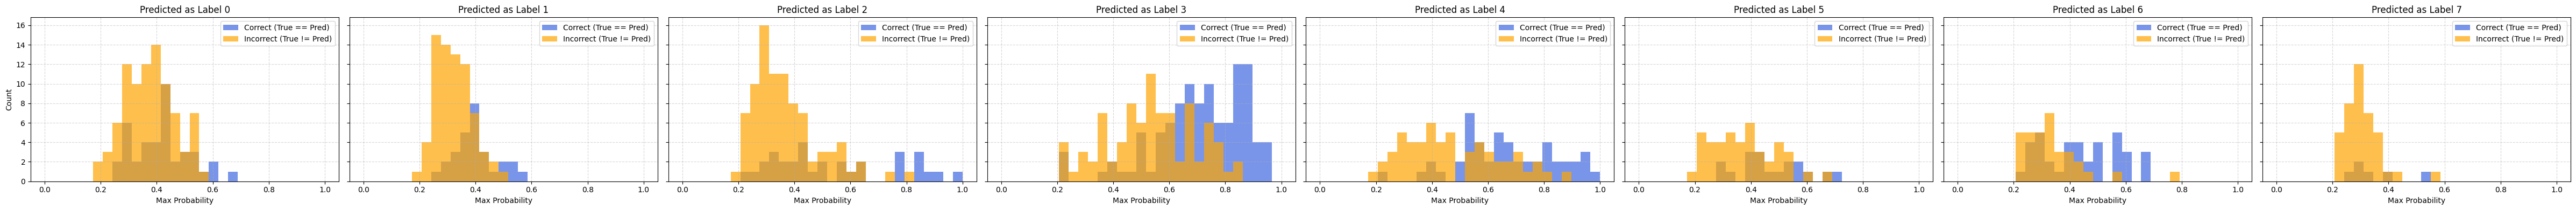

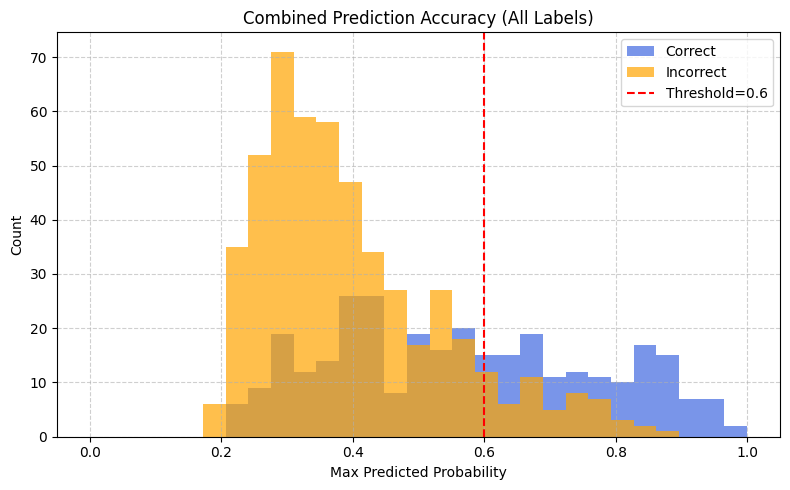

In [567]:
correct_mask = pred_labels == true_labels
max_probs = train_max_probs

unique_labels = np.unique([label for label in true_labels if label != -1])
bins = np.linspace(0, 1.0, 30)

# Í∞Å ÎùºÎ≤®Î≥Ñ Í∞úÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû®
fig, axes = plt.subplots(1, len(unique_labels), figsize=(6 * len(unique_labels), 4), sharey=True)

# ÌÜµÌï©Ïö© Î∞∞Ïó¥ Ï¥àÍ∏∞Ìôî
all_correct = []
all_incorrect = []

for idx, label in enumerate(unique_labels):
    ax = axes[idx] if len(unique_labels) > 1 else axes

    # Ïù¥ ÎùºÎ≤®Î°ú ÏòàÏ∏°Ìïú Í≤ΩÏö∞
    label_pred_mask = (pred_labels == label)

    # Í∑∏ Ï§ë Ïã§Ï†ú Ï†ïÎãµÏù∏ Í≤ΩÏö∞ / ÏïÑÎãå Í≤ΩÏö∞
    correct = max_probs[label_pred_mask & (true_labels == label)]
    incorrect = max_probs[label_pred_mask & (true_labels != label)]

    all_correct.extend(correct)
    all_incorrect.extend(incorrect)

    # ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
    ax.hist(correct, bins=bins, alpha=0.7, label='Correct (True == Pred)', color='royalblue')
    ax.hist(incorrect, bins=bins, alpha=0.7, label='Incorrect (True != Pred)', color='orange')
    ax.set_title(f"Predicted as Label {label}")
    ax.set_xlabel("Max Probability")
    if idx == 0:
        ax.set_ylabel("Count")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Ï†ÑÏ≤¥ Correct vs Incorrect ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.figure(figsize=(8, 5))
plt.hist(all_correct, bins=bins, alpha=0.7, label="Correct", color='royalblue')
plt.hist(all_incorrect, bins=bins, alpha=0.7, label="Incorrect", color='orange')
plt.axvline(x=0.6, color='red', linestyle='--', label="Threshold=0.6")
plt.xlabel("Max Predicted Probability")
plt.ylabel("Count")
plt.title("Combined Prediction Accuracy (All Labels)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [568]:
from scipy.stats import ks_2samp
from sklearn.metrics import precision_score
import numpy as np

# 1. KS-testÎ°ú Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùÄ ÎùºÎ≤® Ï∂îÏ∂ú
significant_labels = []

for label in unique_labels:
    label_pred_mask = (pred_labels == label)
    correct = max_probs[label_pred_mask & (true_labels == label)]
    incorrect = max_probs[label_pred_mask & (true_labels != label)]

    if len(correct) > 0 and len(incorrect) > 0:
        ks_stat, ks_p = ks_2samp(correct, incorrect)
        print(f"[Label {label}] KS test ‚Üí stat={ks_stat:.3f}, p={ks_p:.4e}")
        if ks_p < 0.05:
            significant_labels.append(label)
    else:
        print(f"[Label {label}] Îç∞Ïù¥ÌÑ∞ Î∂ÄÏ°±ÏúºÎ°ú ÌÖåÏä§Ìä∏ ÏÉùÎûµ")

insignificant_labels = set(unique_labels) - set(significant_labels)
print("\n‚úÖ Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùÄ ÎùºÎ≤®Îì§:", insignificant_labels)

# 2. KS Í∏∞Î∞ò ÌïÑÌÑ∞ Ï†ÅÏö©: ÎùºÎ≤®Ïù¥ Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏúºÎ©¥ -1Î°ú
ks_filtered_preds = np.array([
    label if label not in insignificant_labels else -1
    for label in pred_labels
])

[Label 0] KS test ‚Üí stat=0.282, p=1.9769e-02
[Label 1] KS test ‚Üí stat=0.476, p=1.1068e-04
[Label 2] KS test ‚Üí stat=0.409, p=4.9145e-04
[Label 3] KS test ‚Üí stat=0.478, p=2.1593e-10
[Label 4] KS test ‚Üí stat=0.505, p=1.3185e-06
[Label 5] KS test ‚Üí stat=0.415, p=1.7616e-02
[Label 6] KS test ‚Üí stat=0.427, p=1.9305e-03
[Label 7] KS test ‚Üí stat=0.283, p=7.0517e-01

‚úÖ Ïú†ÏùòÎØ∏ÌïòÏßÄ ÏïäÏùÄ ÎùºÎ≤®Îì§: {np.int64(7)}


In [ ]:
from sklearn.metrics import precision_score

# 3. Precision Í∏∞Ï§Ä threshold ÌÉêÏÉâ (KS ÌïÑÌÑ∞ Ï†ÅÏö©Îêú ÏÉÅÌÉúÏóêÏÑúÎßå)
thresholds = np.linspace(0.1, 0.9, 81)
min_coverage = 0.2  # ÏµúÏÜå 20%Îäî ÏòàÏ∏°Ìï¥Ïïº ÌïúÎã§
best_threshold = 0.0
best_precision = 0.0

for T in thresholds:
    pred_T = np.where(train_max_probs >= T, pred_labels, -1)
    valid_mask = pred_T != -1
    preds = pred_T[valid_mask]
    trues = true_labels[valid_mask]
    coverage = np.mean(valid_mask)

    if coverage >= min_coverage and len(preds) > 0:
        precision = precision_score(trues, preds, average='micro')
        if precision > best_precision:
            best_precision = precision
            best_threshold = T

print(f"\n‚úÖ ÏµúÏ†Å threshold (KS ÌïÑÌÑ∞ ÌõÑ): {best_threshold:.2f}, Precision: {best_precision:.4f}")

# 4. ÏµúÏ¢Ö ÏòàÏ∏°: KS ÌïÑÌÑ∞ + threshold ÌïÑÌÑ∞ Î™®Îëê Ï†ÅÏö©
final_preds = np.where(train_max_probs >= best_threshold, ks_filtered_preds, -1)

# 5. NoiseÎ°ú Î∂ÑÎ•òÎêú Ïàò ÎπÑÍµê
total_samples = len(pred_labels)
ks_noise_count = np.sum(ks_filtered_preds == -1)
final_noise_count = np.sum(final_preds == -1)

print(f"\nüìä Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: {total_samples}")
print(f"üîπ KS ÌïÑÌÑ∞Î°ú noise Ï≤òÎ¶¨Îêú Ïàò: {ks_noise_count} ({ks_noise_count/total_samples:.2%})")
print(f"üî∏ ÏµúÏ¢Ö noise Ïàò (KS + Threshold): {final_noise_count} ({final_noise_count/total_samples:.2%})")



‚úÖ ÏµúÏ†Å threshold (KS ÌïÑÌÑ∞ ÌõÑ): 0.62, Precision: 0.7456

üìä Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò: 822
üîπ KS ÌïÑÌÑ∞Î°ú noise Ï≤òÎ¶¨Îêú Ïàò: 46 (5.60%)
üî∏ ÏµúÏ¢Ö noise Ïàò (KS + Threshold): 653 (79.44%)


In [ ]:
!pip install seaborn

‚úÖ Confusion Matrix BEFORE Threshold:
         Pred -1  Pred 0  Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  \
True -1        0      17      38      42      18      19      21       6   
True 0         0      40      10      14       1       7       3       7   
True 1         0      25      28      14       0       1       3       4   
True 2         0      10       1      32      14      16      10       1   
True 3         0       0       1       1     105      10       4       2   
True 4         0       0       0       0      39      49       2       0   
True 5         0       5       7       3      14       3      18       6   
True 6         0      14       8       7       0       0       0      38   
True 7         0      16       7       7       1       0       0       7   

         Pred 7  
True -1      19  
True 0        1  
True 1        2  
True 2        0  
True 3       11  
True 4        0  
True 5        5  
True 6        2  
True 7        6  

‚úÖ Confusion Matri

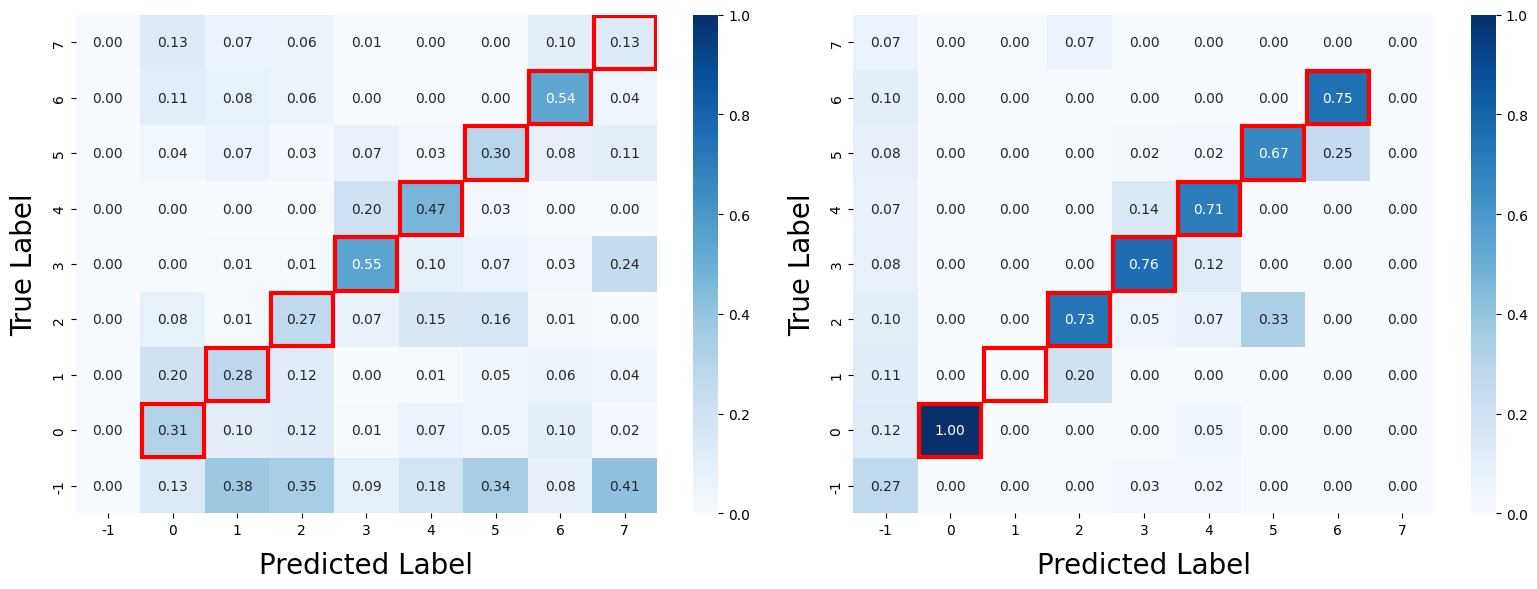

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.patches as patches

# ÏõêÎûò ÏòàÏ∏°Í∞í
original_preds = pred_labels

# threshold Ï†ÅÏö©Îêú ÏòàÏ∏°Í∞í
thresholded_preds = final_preds  # Ïù¥ÎØ∏ np.where(...)Î°ú Íµ¨Ìï¥ÏßÑ ÏÉÅÌÉú

# Î™®Îì† ÎùºÎ≤® Ï†ïÎ¶¨ (noise -1 Ìè¨Ìï®)
label_set = sorted(set(np.unique(true_labels)) | set(np.unique(thresholded_preds)))
axis_set = sorted([-1] + [int(i) for i in unique_labels])

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm_before = confusion_matrix(true_labels, original_preds, labels=axis_set)
cm_after = confusion_matrix(true_labels, thresholded_preds, labels=axis_set)

# Î≥¥Í∏∞ Ï¢ãÍ≤å Ï∂úÎ†•
df_before = pd.DataFrame(cm_before, index=[f"True {l}" for l in axis_set],
                                     columns=[f"Pred {l}" for l in axis_set])
df_after = pd.DataFrame(cm_after, index=[f"True {l}" for l in axis_set],
                                   columns=[f"Pred {l}" for l in axis_set])

print("‚úÖ Confusion Matrix BEFORE Threshold:")
print(df_before)

print("\n‚úÖ Confusion Matrix AFTER Threshold:")
print(df_after)


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

def plot_dual_confusion_heatmap_colnorm_filtered_with_diagonal(
    cm_before, cm_after,
    labels, pred_label_range,
    excluded_preds_right,
    excluded_preds_left={-1},
    unique_labels=None,
    titles=("Before Threshold", "After Threshold")
):
    import matplotlib.patches as patches

    # Ïó¥ Í∏∞Ï§Ä Ï†ïÍ∑úÌôî
    cm_before_norm = cm_before.astype('float')
    cm_after_norm = cm_after.astype('float')

    cm_before_norm = np.divide(cm_before_norm, cm_before_norm.sum(axis=0, keepdims=True),
                                out=np.zeros_like(cm_before_norm), where=cm_before_norm.sum(axis=0, keepdims=True)!=0)
    cm_after_norm = np.divide(cm_after_norm, cm_after_norm.sum(axis=0, keepdims=True),
                               out=np.zeros_like(cm_after_norm), where=cm_after_norm.sum(axis=0, keepdims=True)!=0)

    # Ïó¥ ÌïÑÌÑ∞ÎßÅ: ÏòàÏ∏°Í∞íÏù¥ 0~5Ïù∏ Ïó¥Îßå Î≥¥Í∏∞
    pred_indices = [labels.index(l) for l in pred_label_range if l in labels]
    filtered_labels = [labels[i] for i in pred_indices]

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Í∞ÄÎ°ú Í∏∏Ïù¥ Ï¶ùÍ∞Ä
    plt.subplots_adjust(wspace=0.2)  # üîß Îëê Í∑∏ÎûòÌîÑ Í∞Ñ Í∞ÑÍ≤© Ï§ÑÏûÑ (Í∏∞Î≥∏ÏùÄ 0.4~0.5)


    for idx, (ax, cm_norm, title) in enumerate(zip(axes, [cm_before_norm, cm_after_norm], titles)):
        cm_filtered = cm_norm[:, pred_indices]

        sns.heatmap(
            cm_filtered,
            annot=True,
            fmt=".2f",
            cmap="Blues",
            xticklabels=filtered_labels,
            yticklabels=labels,
            vmin=0.0,
            vmax=1.0,
            ax=ax
        )
        ax.set_xlabel("Predicted Label", fontsize=20, labelpad=10)
        ax.set_ylabel("True Label", fontsize=20, labelpad=10)
        ax.tick_params(axis='both', labelsize=10)
        ax.invert_yaxis()


        offset = 0.02  # or 0.03 for Îçî ÏïàÏ™Ω

        for row_idx, true_label in enumerate(labels):
            for col_idx, pred_label in zip(range(len(filtered_labels)), filtered_labels):
                if true_label == pred_label:

                    # üîí Ïò§Î•∏Ï™Ω heatmapÏóêÏÑúÎäî unique_labelsÎßå ÌóàÏö©
                    if idx == 1 and true_label not in unique_labels:
                        continue

                    # üîí Ï†úÏô∏Îêú ÎùºÎ≤® Î¨¥Ïãú
                    if idx == 1 and pred_label in excluded_preds_right:
                        continue
                    if idx == 0 and pred_label in excluded_preds_left:
                        continue

                    # ‚úÖ Îπ®Í∞Ñ Î∞ïÏä§ Í∑∏Î¶¨Í∏∞
                    rect = patches.Rectangle(
                        (col_idx + offset, row_idx + offset),
                        1 - 2 * offset,
                        1 - 2 * offset,
                        fill=False, edgecolor='red', linewidth=3
                    )
                    ax.add_patch(rect)
                    

    plt.tight_layout()
    plt.show()


insignificant_list = [int(i) for i in insignificant_labels] + [-1]
plot_dual_confusion_heatmap_colnorm_filtered_with_diagonal(
    cm_before, cm_after,
    labels=axis_set,
    pred_label_range=axis_set,
    excluded_preds_right=insignificant_list,
    excluded_preds_left={-1},
    unique_labels=unique_labels  # ‚úÖ Íº≠ Ï†ÑÎã¨
)

# For test data

## label Î≥Ñ Î∞©Ìñ•ÏÑ± Íµ¨ÌïòÍ∏∞

In [ ]:
c_n = 8
base_path = f'/SIMPC/res/{data_name}/simpc_Framework2_{data_name}_cvr_clus{c_n}_k{c_n}_l18-22_dba_trad'
file_path = f'{base_path}_labels.pkl'
with open(file_path, 'rb') as f:
    labels = pickle.load(f)

label_counts = Counter(labels)
for label, count in label_counts.items():
    print(f"Label {label}: {count}Í∞ú")

file_path = f'{base_path}_segmentation.pkl'
with open(file_path, 'rb') as f:
    segmentation = pickle.load(f)
    
file_path = f'{base_path}_subsequences.pkl'
with open(file_path, 'rb') as f:
    subsequence = pickle.load(f)
    print(subsequence[0].shape)

Label 0: 83Í∞ú
Label 1: 77Í∞ú
Label 2: 84Í∞ú
Label 3: 134Í∞ú
Label 4: 90Í∞ú
Label 5: 61Í∞ú
Label 6: 69Í∞ú
Label 7: 44Í∞ú
(20, 3)


In [ ]:

import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.interpolate import interp1d


# Í≤∞Í≥º Ï†ÄÏû•
returns_by_label = defaultdict(list)
directions_by_label = defaultdict(list)

train_data = pd.read_csv(f'/Data/{data_name}/{data_name}_train.csv')

# test_dataÎäî Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ (DataFrame), "close" Ïª¨ÎüºÏù¥ ÏûàÏñ¥Ïïº Ìï®
close_series = train_data["close"].values

for i in range(len(subsequence)):
    label = labels[i]
    start_idx = segmentation[i]
    subseq_len = subsequence[i].shape[0]  # subsequence Í∏∏Ïù¥ (ÏõêÎûò ÏãúÍ≥ÑÏó¥ Í∏∞Ï§Ä)

    # subsequenceÏóê Ìï¥ÎãπÌïòÎäî ÏõêÎ≥∏ close ÏãúÍ≥ÑÏó¥ Ï°∞Í∞Å Ï∂îÏ∂ú
    raw_close = close_series[start_idx : start_idx + subseq_len]

    # Î≥¥Í∞Ñ: Í∏∏Ïù¥Î•º 100ÏúºÎ°ú ÎßûÏ∂§
    x_old = np.linspace(0, 1, len(raw_close))
    x_new = np.linspace(0, 1, 100)
    interpolator = interp1d(x_old, raw_close, kind='linear')
    interpolated_close = interpolator(x_new)

    # 4/5 = 80Î≤àÏß∏, 5/5 = 99Î≤àÏß∏
    price_start = interpolated_close[80]
    price_end = interpolated_close[99]

    # ÏàòÏùµÎ•† Í≥ÑÏÇ∞
    if price_start == 0:
        continue  # 0ÏúºÎ°ú ÎÇòÎàÑÎäî Í≤É Î∞©ÏßÄ
    return_ratio = (price_end - price_start) / price_start
    direction = np.sign(price_end - price_start)  # +1, 0, -1

    # Î†àÏù¥Î∏îÎ≥Ñ Ï†ÄÏû•
    returns_by_label[label].append(return_ratio)
    directions_by_label[label].append(direction)

# ÌèâÍ∑† Í≥ÑÏÇ∞
for label in sorted(set(labels)):
    ret_list = returns_by_label[label]
    dir_list = directions_by_label[label]
    
    if ret_list:
        mean_return = np.mean(ret_list)
        mean_direction = np.mean(dir_list)
        print(f"Label {label}: ÌèâÍ∑† ÏàòÏùµÎ•† = {mean_return:.4f}, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = {mean_direction:.2f}")
    else:
        print(f"Label {label}: Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
        #0, 1, 4

Label 0: ÌèâÍ∑† ÏàòÏùµÎ•† = 0.0176, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = 0.61
Label 1: ÌèâÍ∑† ÏàòÏùµÎ•† = 0.0106, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = 0.27
Label 2: ÌèâÍ∑† ÏàòÏùµÎ•† = 0.0128, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = 0.57
Label 3: ÌèâÍ∑† ÏàòÏùµÎ•† = -0.0299, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = -0.64
Label 4: ÌèâÍ∑† ÏàòÏùµÎ•† = 0.0022, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = 0.04
Label 5: ÌèâÍ∑† ÏàòÏùµÎ•† = -0.0081, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = -0.48
Label 6: ÌèâÍ∑† ÏàòÏùµÎ•† = 0.0012, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = 0.16
Label 7: ÌèâÍ∑† ÏàòÏùµÎ•† = -0.0055, ÌèâÍ∑† Î∞©Ìñ•ÏÑ± = -0.36


In [575]:
# ÌèâÍ∑† Í≥ÑÏÇ∞ Î∞è Ï∂úÎ†• + Îß§Ìïë
label_mapping = {-1: -1}  # -1ÏùÄ Í∏∞Î≥∏ Í≥†Ï†ï
print("\n[ÎùºÎ≤®Î≥Ñ ÌèâÍ∑† ÏàòÏùµÎ•† Î∞è Î∞©Ìñ•ÏÑ±]")
for label in sorted(set(labels)):
    ret_list = returns_by_label[label]
    dir_list = directions_by_label[label]
    
    if ret_list:
        mean_return = np.mean(ret_list)
        mean_direction = np.mean(dir_list)

        if mean_direction > 0:
            label_mapping[label] = 1  # Î°±
        elif mean_direction < 0:
            label_mapping[label] = 0  # Ïàè
        else:
            label_mapping[label] = -1  # Í±∞Îûò ÏïàÌï®
    else:
        print(f"Label {label}: Îç∞Ïù¥ÌÑ∞ ÏóÜÏùå")
        label_mapping[label] = -1  # Îç∞Ïù¥ÌÑ∞ ÏóÜÏùÑ Îïê Í±∞Îûò ÏïàÌï® Ï≤òÎ¶¨

print("\n[ÏûêÎèô ÏÉùÏÑ±Îêú Label Îß§Ìïë]")
print(label_mapping)


[ÎùºÎ≤®Î≥Ñ ÌèâÍ∑† ÏàòÏùµÎ•† Î∞è Î∞©Ìñ•ÏÑ±]

[ÏûêÎèô ÏÉùÏÑ±Îêú Label Îß§Ìïë]
{-1: -1, 0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0}


In [ ]:
stage = 'test' # train, test
data = pd.read_csv(f'/Data/{data_name}/{data_name}_{stage}.csv')
drop_cols = ['date', 'MA5', 'MA20', 'MA50', 'MA200']
df = data.drop(columns=[col for col in drop_cols if col in data.columns])

series_length = 20
columns = ["close", "v", "RSI" "OT"]
price_now = [] #ÌòÑÏû¨ Ìå®ÌÑ¥Ïù¥ xÏùº Îïå Ïù¥ÎïåÏùò Ï†úÏùº ÎßàÏßÄÎßâ Í∞ÄÍ≤©
price_future = [] #ÌòÑÏû¨ Ìå®ÌÑ¥Ïù¥ xÏùº Îïå Ïù¥ÎïåÏùò Ï†úÏùº ÎßàÏßÄÎßâ Ïùº + 4ÏùºÏùò Í∞ÄÍ≤©

for i in range(15, len(df) - 4+1, 4):
    price_now.append(df["close"][i])
    price_future.append(df["close"][i+4])


data_rows = []
labels = []

for i in range(0, len(df) - series_length+1, 4):
    close_series = df["close"][i : i + series_length].tolist()
    volume_series = df["v"][i : i + series_length].tolist()
    rsi_series = df["RSI"][i : i + series_length].tolist()

    # (3, series_length) ÌòïÌÉúÎ°ú ÎßåÎì§Í∏∞
    sample = np.array([close_series, volume_series, rsi_series])  # shape: (3, series_length)
    data_rows.append(sample)

    # Î†àÏù¥Î∏î Ï†ÄÏû•
    label = df["OT"][i + series_length-5]
    labels.append(label)

# Î¶¨Ïä§Ìä∏Î•º ÏµúÏ¢Ö numpy arrayÎ°ú Î≥ÄÌôò
data_array = np.stack(data_rows)  # shape: (N, 3, series_length)
labels_array = np.array(labels)   # shape: (N,)

# ÌôïÏù∏
print("data_array.shape:", data_array.shape)
print("labels_array.shape:", labels_array.shape)

In [577]:
target_length = 80 #ÌïôÏäµÎã®Í≥ÑÏôÄ ÎèôÏùºÌïòÍ≤å ÎßûÏ∂§
test_inter = interpolate_normalize_subsequences(data_array, target_length)
test_inter.shape

num_instances 233
num_variables 3


(233, 3, 80)

In [ ]:
prefix_file = f'/JISC-Net/jiscnet/result/F_{data_name}_{c_n}_shapelet{c_n + 2}{alpha}'

file_path = f'{prefix_file}_shapelet.pkl'
with open(file_path, 'rb') as f:
    shapelet = pickle.load(f)
    
file_path = f'{prefix_file}_utility_sort_index.pkl'
with open(file_path, 'rb') as f:
    utility_sort_index = pickle.load(f)

model = wrappers.CausalCNNEncoderClassifier()
hf = open('/JISC-Net/jiscnet/default_parameters.json', 'r')
hp_dict = json.load(hf)
hf.close()
model.set_params(**hp_dict)
model.load(prefix_file)

encoder = model.encoder
encoder.eval()
print(next(encoder.parameters()).device)

classifier = model.classifier

X_test_features = model.shapelet_transformation(test_inter, shapelet, utility_sort_index)
print("X_test_features shape: ", X_test_features.shape)
test_probs = classifier.predict_proba(X_test_features)
print('test_probs: ', test_probs.shape)

In [579]:
test_max_probs = np.max(test_probs, axis=1)
#print('pattern_max_probs: ', pattern_max_probs)
print('test_max_probs: ', test_max_probs.shape)

true_labels = labels_array
pred_labels = np.argmax(test_probs, axis=1) # ÏòàÏ∏° label
true_labels = labels_array
pred_labels_ori = pred_labels
print('true_labels: ', true_labels.shape)
print('pred_labels: ', pred_labels.shape)

test_max_probs:  (233,)
true_labels:  (233,)
pred_labels:  (233,)


In [ ]:
allowed_labels = [int(x) for x in significant_labels]

In [ ]:
# ÏµúÏ¢Ö threshold Ï†ÅÏö© Í≤∞Í≥º
# ÌóàÏö©Îêú ÌÅ¥ÎûòÏä§ Î™©Î°ù
#allowed_labels = {0, 1, 4}

# 0,1,4 Ïô∏ÏóêÎäî -1Î°ú ÎåÄÏ≤¥
ks_filtered_preds = np.where(np.isin(pred_labels, list(allowed_labels)), pred_labels, -1)
final_preds = np.where(test_max_probs >= best_threshold, ks_filtered_preds, -1)
valid_mask = final_preds != -1

# ÎπÑÏú® Í≥ÑÏÇ∞
valid_ratio = np.mean(valid_mask)
valid_count = np.sum(valid_mask)
total_count = len(final_preds)

print(f"‚úÖ -1Ïù¥ ÏïÑÎãå ÏòàÏ∏° Í∞úÏàò: {valid_count} / {total_count}")
print(f"üìä Ïú†Ìö® ÏòàÏ∏° ÎπÑÏú®: {valid_ratio:.2%}")


‚úÖ -1Ïù¥ ÏïÑÎãå ÏòàÏ∏° Í∞úÏàò: 29 / 233
üìä Ïú†Ìö® ÏòàÏ∏° ÎπÑÏú®: 12.45%


In [583]:
# final_predsÎ•º Îß§ÌïëÎêú Í∞íÏúºÎ°ú Î≥ÄÌôò
pred_labels = np.array([label_mapping.get(p, 0) for p in final_preds])
print('c_n: ', c_n)

print("üîÅ Îß§ÌïëÎêú ÏòàÏ∏°Í∞í (Ïïû 10Í∞ú):", pred_labels)
print(len(pred_labels))

c_n:  8
üîÅ Îß§ÌïëÎêú ÏòàÏ∏°Í∞í (Ïïû 10Í∞ú): [-1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  0  0
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1]
233


In [584]:
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score
import numpy as np

# Ïú†Ìö®Ìïú index (pred_labels != -1)
valid_mask = pred_labels != -1

# ÌèâÍ∞Ä ÎåÄÏÉÅ Ï∂îÏ∂ú
valid_preds = pred_labels[valid_mask]
valid_trues = true_labels[valid_mask]

# ÏßÄÌëú Í≥ÑÏÇ∞
acc = accuracy_score(valid_trues, valid_preds)
mcc = matthews_corrcoef(valid_trues, valid_preds)
f1 = f1_score(valid_trues, valid_preds, average='weighted')  # ÌïÑÏöî Ïãú pos_label=0ÏúºÎ°ú Î≥ÄÍ≤Ω Í∞ÄÎä•

# Ï∂úÎ†•
print(f"‚úÖ Ïú†Ìö® ÌèâÍ∞Ä ÏÉòÌîå Ïàò: {len(valid_preds)}")
print(f"üìä Accuracy: {acc:.4f}") #60ÌîÑÎ°úÏùºÎïå 0.5
print(f"üìä MCC:      {mcc:.4f}")
print(f"üìä F1-score: {f1:.4f}")


‚úÖ Ïú†Ìö® ÌèâÍ∞Ä ÏÉòÌîå Ïàò: 29
üìä Accuracy: 0.7241
üìä MCC:      0.4758
üìä F1-score: 0.7228


## Ï∂îÏ∂úÎêú ÏãúÍ≥ÑÏó¥Ïù¥ Ïñ¥Îäê Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäîÏßÄ

In [586]:
import numpy as np
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score

def evaluate_trades_and_metrics(price_now, price_future, pred_labels, true_labels, fee_rate=0.001):
    """
    pred_labels: ÏòàÏ∏° Í≤∞Í≥º (0: Ïàè, 1: Î°±, -1: Í±∞Îûò ÏïàÌï®)
    true_labels: Ïã§Ï†ú Î∞©Ìñ• (0: ÌïòÎùΩ, 1: ÏÉÅÏäπ)
    price_now: Í±∞Îûò ÏãúÏûë ÏãúÏ†ê Í∞ÄÍ≤©
    price_future: Í±∞Îûò Ï¢ÖÎ£å ÏãúÏ†ê Í∞ÄÍ≤©
    fee_rate: Í±∞Îûò ÏàòÏàòÎ£åÏú® (Ïòà: 0.001ÏùÄ 0.1%)
    """

    price_now = np.array(price_now)
    price_future = np.array(price_future)
    pred_labels = np.array(pred_labels)
    true_labels = np.array(true_labels)
    
    positions = np.where(pred_labels == 1, 1,
                 np.where(pred_labels == 0, -1, 0))

    wins = 0
    returns = []
    profits = []             # ÏàòÏàòÎ£å Ï∞®Í∞ê ÌõÑ ÏàòÏùµ
    gross_profits = []       # ÏàòÏàòÎ£å ÎØ∏Ï†ÅÏö© ÏàòÏùµ

    trade_mask = positions != 0
    pos_used = positions[trade_mask]
    price_start_used = price_now[trade_mask]
    price_end_used = price_future[trade_mask]
    pred_used = pred_labels[trade_mask]
    true_used = true_labels[trade_mask]

    for i in range(len(pos_used)):
        ret_pct = ((price_end_used[i] - price_start_used[i]) / price_start_used[i]) * 100 * pos_used[i]
        returns.append(ret_pct)

        gross_profit = (ret_pct / 100) * 1  # ÏàòÏàòÎ£å ÏóÜÎäî ÏàòÏùµ
        transaction_cost = 2 * 1 * fee_rate  # Îß§Ïàò+Îß§ÎèÑ ÏàòÏàòÎ£å
        net_profit = gross_profit - transaction_cost  # ÏàòÏàòÎ£å Î∞òÏòÅÎêú ÏàòÏùµ

        gross_profits.append(gross_profit)
        profits.append(net_profit)

        if ret_pct > 0:
            wins += 1

    num_trades = len(returns)
    losses = num_trades - wins

    wlr = wins / losses if losses > 0 else float('inf')
    ar = np.mean(returns) if returns else 0
    total_profit = np.sum(profits)           # ÏàòÏàòÎ£å Î∞òÏòÅÎêú Ï¥ù ÏàòÏùµ
    total_profit_gross = np.sum(gross_profits)  # ÏàòÏàòÎ£å ÏóÜÎäî Ï¥ù ÏàòÏùµ

    if num_trades > 0:
        acc = accuracy_score(true_used, pred_used)
        mcc = matthews_corrcoef(true_used, pred_used)
        f1 = f1_score(true_used, pred_used, average='weighted')
    else:
        acc = mcc = f1 = float('nan')

    print(f"‚úÖ Ï¥ù Í±∞Îûò Ïàò: {num_trades}")
    print(f"üìç F1-score: {f1:.3f}")
    print(f"üìà Win-Loss Ratio (WLR): {wlr:.3f}")
    print(f"üìä Average Return (AR): {ar:.3f}%")
    print(f"üíµ Total Profit without fee:  ${total_profit_gross:.3f}")
    print(f"üí∞ Total Profit after 0.1% fee: ${total_profit:.3f}")
    print(f"üéØ Accuracy: {acc:.3f}")
    print(f"üîÅ MCC:      {mcc:.3f}")

    return wlr, ar, acc, mcc, f1, total_profit, total_profit_gross

# ÏòàÏãú Ïã§Ìñâ
wlr, ar, acc, mcc, f1, total_profit, total_transaction_cost = evaluate_trades_and_metrics(
    price_now, price_future, pred_labels, true_labels
)


‚úÖ Ï¥ù Í±∞Îûò Ïàò: 29
üìç F1-score: 0.723
üìà Win-Loss Ratio (WLR): 2.625
üìä Average Return (AR): 1.567%
üíµ Total Profit without fee:  $0.454
üí∞ Total Profit after 0.1% fee: $0.396
üéØ Accuracy: 0.724
üîÅ MCC:      0.476


In [ ]:
base_path = f'/SIMPC/res/{data_name}'
file_name = f'simpc_Framework2_{data_name}_cvr_clus{c_n}_k{c_n}_l18-22_dba_trad'


file_path = f'{base_path}/{file_name}_centroids_new.pkl'
with open(file_path, 'rb') as f:
    new_centroid = pickle.load(f)
    print('centroids shape: ', new_centroid.shape)
    
# Í±∞ÎûòÌïú Í≤ΩÏö∞Îßå ÌïÑÌÑ∞ÎßÅ (pred_labelsÍ∞Ä -1Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå)
trade_mask = pred_labels != -1

# Í±∞ÎûòÌïú Í≤É Ï§ëÏóêÏÑú ÎßûÏ∂ò Í≤ÉÍ≥º ÌãÄÎ¶∞ Í≤É Íµ¨Î∂Ñ
pred_traded = pred_labels[trade_mask]
true_traded = true_labels[trade_mask]
data_traded = data_array[trade_mask]
pred_labels_ori_traded = pred_labels_ori[trade_mask]

correct_mask = pred_traded == true_traded

# ÎßûÏ∂ò ÏãúÌÄÄÏä§ÏôÄ ÌãÄÎ¶∞ ÏãúÌÄÄÏä§
correct_seq = data_traded[correct_mask]
correct_pred_labels = pred_labels_ori_traded[correct_mask]

incorrect_seq = data_traded[~correct_mask]
incorrect_pred_labels = pred_labels_ori_traded[~correct_mask]

centroids shape:  (8, 22, 3)


In [588]:
def sample_by_label_sorted(sequences, labels, max_per_label=3):
    """
    ÎùºÎ≤® Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìïú ÌõÑ, ÎùºÎ≤®Î≥ÑÎ°ú ÏµúÎåÄ max_per_labelÍ∞úÍπåÏßÄ ÏÉòÌîåÏùÑ Ï∂îÏ∂ú.
    """
    unique_labels = sorted(set(labels))
    selected_sequences = []
    selected_labels = []

    for label in unique_labels:
        mask = labels == label
        label_seqs = sequences[mask]
        count = min(len(label_seqs), max_per_label)
        selected_sequences.extend(label_seqs[:count])
        selected_labels.extend([label] * count)

    return np.array(selected_sequences), np.array(selected_labels)

# Ï†ïÎ†¨Îêú ÎùºÎ≤® Í∏∞Ï§ÄÏúºÎ°ú ÏµúÎåÄ 3Í∞úÏî© Ï∂îÏ∂ú
correct_seq_sorted, correct_label_sorted = sample_by_label_sorted(correct_seq, correct_pred_labels, max_per_label=1)
incorrect_seq_sorted, incorrect_label_sorted = sample_by_label_sorted(incorrect_seq, incorrect_pred_labels, max_per_label=3)


In [589]:
def sample_by_label_sorted(sequences, labels):
    """
    ÎùºÎ≤® Ïò§Î¶ÑÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨Ìïú ÌõÑ, ÎùºÎ≤®Î≥ÑÎ°ú Î™®Îì† ÏÉòÌîåÏùÑ Ï∂îÏ∂ú.
    """
    unique_labels = sorted(set(labels))
    selected_sequences = []
    selected_labels = []

    for label in unique_labels:
        mask = labels == label
        label_seqs = sequences[mask]
        selected_sequences.extend(label_seqs)
        selected_labels.extend([label] * len(label_seqs))

    return np.array(selected_sequences), np.array(selected_labels)
correct_seq_sorted, correct_label_sorted = sample_by_label_sorted(correct_seq, correct_pred_labels)
incorrect_seq_sorted, incorrect_label_sorted = sample_by_label_sorted(incorrect_seq, incorrect_pred_labels)


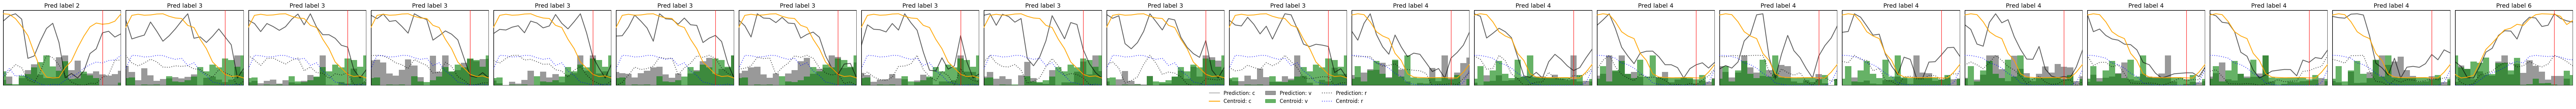

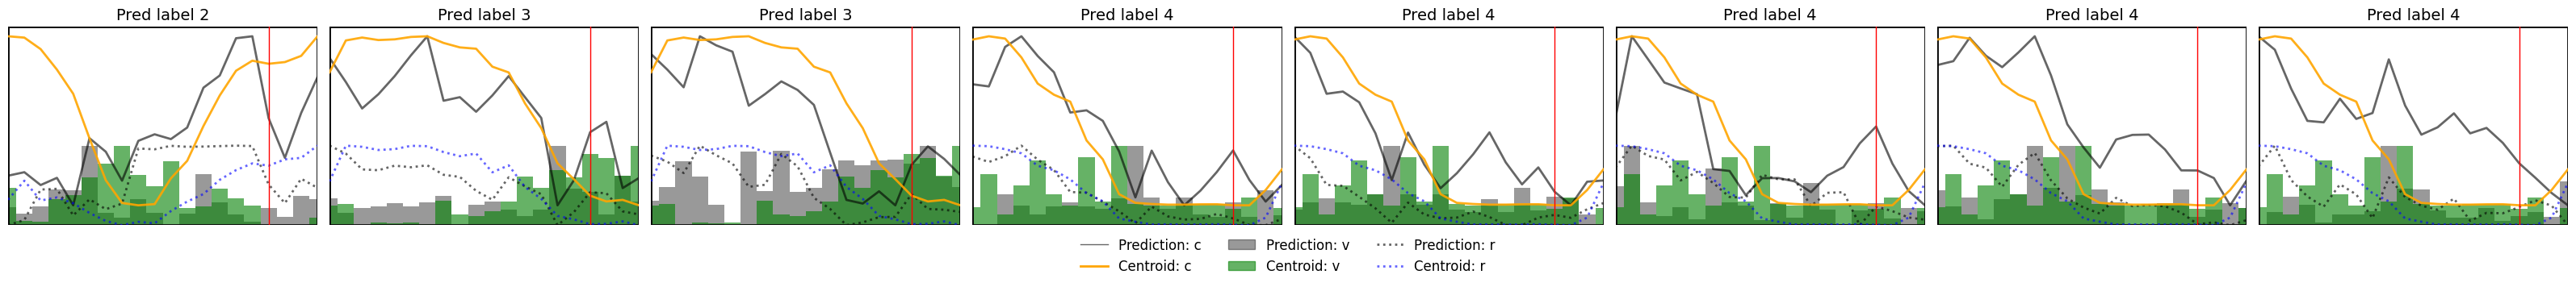

In [591]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def overlay_prediction_with_centroid(sequences, labels, centroids, variable):
    """
    ÏòàÏ∏° ÏãúÌÄÄÏä§ÏôÄ centroidÎ•º subplotÏóê Í∑∏Î†§ÏÑú ÎπÑÍµê.
    - centroid: ÏÉâÏÉÅ Ìè¨Ìï®Îêú Ïã§ÏÑ†, bar, Ï†êÏÑ†
    - sequence: Î™®Îëê Í≤ÄÏ†ïÏÉâÏúºÎ°ú c(Ïã§ÏÑ†), v(bar), r(Ï†êÏÑ†)
    - subplot ÎπÑÏú® 4:3, Í≤ÄÏùÄ ÌÖåÎëêÎ¶¨, ÏñëÏ™Ω padding Ï†úÍ±∞
    """
    centroid_color_map = {'c': 'orange', 'v': 'green', 'r': 'blue'}
    range_map = {'c': (0.1, 0.95), 'v': (0, 0.4), 'r': (0.0, 0.4)}

    n_seqs = len(sequences)
    fig, axs = plt.subplots(1, n_seqs, figsize=(n_seqs * 4, 3))

    if n_seqs == 1:
        axs = [axs]

    for i in range(n_seqs):
        seq = sequences[i]            # (3, T_pred)
        label = labels[i]
        ax = axs[i]
        T_pred = seq.shape[1]
        x_axis = np.arange(T_pred)

        # ÏòàÏ∏° ÏãúÌÄÄÏä§ (Î™®Îëê Í≤ÄÏ†ïÏÉâ)
        for j in reversed(range(seq.shape[0])):
            s = seq[j]
            norm = (s - np.min(s)) / (np.max(s) - np.min(s) + 1e-6)
            low, high = range_map[variable[j]]
            scaled = norm * (high - low) + low

            if variable[j] == 'v':
                ax.bar(x_axis, scaled, color='black', width=1.0, alpha=0.4)
            elif variable[j] == 'r':
                ax.plot(x_axis, scaled, color='black', linestyle=':', linewidth=2.0, alpha=0.6)
            else:  # 'c'
                ax.plot(x_axis, scaled, color='black', linestyle='-', linewidth=2.0, alpha=0.6)

        # centroid Î≥¥Í∞Ñ ÌõÑ Ïã§ÏÑ†/Ï†êÏÑ†/bar
        center = centroids[label]     # (T_cent, 3)
        T_cent = center.shape[0]
        x_old = np.linspace(0, 1, T_cent)
        x_new = np.linspace(0, 1, T_pred)

        for j in reversed(range(center.shape[1])):
            series = center[:, j]
            interp_func = interp1d(x_old, series, kind='linear')
            interpolated = interp_func(x_new)

            norm = (interpolated - np.min(interpolated)) / (np.max(interpolated) - np.min(interpolated) + 1e-6)
            low, high = range_map[variable[j]]
            scaled = norm * (high - low) + low

            color = centroid_color_map[variable[j]]
            if variable[j] == 'v':
                ax.bar(x_axis, scaled, color=color, width=1.0, alpha=0.6)
            elif variable[j] == 'r':
                ax.plot(x_axis, scaled, color=color, linestyle=':', linewidth=2.0, alpha=0.6)
            else:  # 'c'
                ax.plot(x_axis, scaled, color=color, linestyle='-', linewidth=2.0, alpha=0.9)

        # ÏÑ§Ï†ï
        ax.set_title(f'Pred label {label}', fontsize=14)
        ax.axvline(x=16, color='red', linestyle='-', linewidth=1)
        ax.set_xlim(0, T_pred - 1)  # üìå xÏ∂ï padding Ï†úÍ±∞
        ax.set_ylim(0, 1)
        ax.axis('off')

        # Í≤ÄÏùÄ ÌÖåÎëêÎ¶¨
        rect = patches.Rectangle(
            (0, 0), 1, 1,
            transform=ax.transAxes,
            fill=False,
            edgecolor='black',
            linewidth=2
        )
        ax.add_patch(rect)

    # üìå Î≤îÎ°Ä (centroid / prediction)

    fig.legend(handles=[
        plt.Line2D([0],[0],color='black',alpha=0.6,linestyle='-',linewidth=1,label='Prediction: c'),
        plt.Line2D([0],[0],color='orange',linestyle='-',linewidth=2,label='Centroid: c'),
        plt.Rectangle((0,0),1,1,color='black',alpha=0.4,label='Prediction: v'),
        plt.Rectangle((0,0),1,1,color='green',alpha=0.6,label='Centroid: v'),
        plt.Line2D([0],[0],color='black',alpha=0.6,linestyle=':',linewidth=2,label='Prediction: r'),
        plt.Line2D([0],[0],color='blue',alpha=0.6,linestyle=':',linewidth=2,label='Centroid: r')],
        loc='lower center', ncol=3, frameon=False, fontsize=12, bbox_to_anchor=(0.5, -0.2)
    )



    plt.tight_layout()
    plt.show()



overlay_prediction_with_centroid(
    sequences=correct_seq_sorted,        # (N, 3, T_pred)
    labels=correct_label_sorted,         # (N,)
    centroids=new_centroid,              # (L, T_cent, 3)
    variable=['c', 'v', 'r']
)

overlay_prediction_with_centroid(
    sequences=incorrect_seq_sorted,        # (N, 3, T_pred)
    labels=incorrect_label_sorted,         # (N,)
    centroids=new_centroid,              # (L, T_cent, 3)
    variable=['c', 'v', 'r']
)
